In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

data = pd.read_csv('C:/Users/Advait C/Desktop/Coding/FaceDetector/age_gender.csv')
print(data.head(2))

#We see that the data is having the pixels given as numbers so we convert them into a numpy array 
data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))


print(len(data['pixels'].iloc[1]))

#As square root of 2304 is 48, we can say the dimensions of the image is (48, 48)

from sklearn.model_selection import train_test_split
x = np.array(data['pixels'].tolist())
x = x.reshape(x.shape[0], 48, 48, 1)

y = data['age']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

   age  ethnicity  gender                        img_name  \
0    1          2       0  20161219203650636.jpg.chip.jpg   
1    1          2       0  20161219222752047.jpg.chip.jpg   

                                              pixels  
0  129 128 128 126 127 130 133 135 139 142 145 14...  
1  164 74 111 168 169 171 175 182 184 188 193 199...  
2304


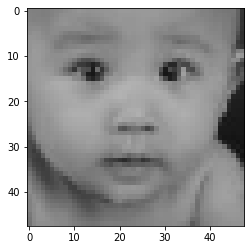

In [2]:
import cv2 as cv

#Let's look at a sample image to see how it looks like
img = x[0]
img = img.reshape(img.shape[0], img.shape[1]).astype(np.uint8)

#As OpenCV uses BGR color scheme and plt uses RGB color scheme, we make the switch to display the image
imgs = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(imgs)
plt.show()

In [6]:
#We create a Sequential model for the input shape of (48, 48)
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from sklearn.metrics import mean_absolute_error

model = Sequential()


model.add(Conv2D(8, (3, 3), input_shape = (48, 48, 1), activation = 'relu'))
#New dimensions would be 46 x 46 x 8

model.add(MaxPooling2D(pool_size = (2, 2)))
#New dimensions would be 23 x 23 x 8

model.add(Conv2D(8, (4, 4), activation = 'relu'))
#New dimensions would be 20 x 20 x 8

model.add(MaxPooling2D(pool_size = (2, 2)))
#New dimensions would be 10 x 10 x 8

model.add(Conv2D(8, (3, 3), activation = 'relu'))
#New dimensions would be 8 x 8 x 8

model.add(MaxPooling2D(pool_size = (2, 2)))
#New dimensions would be 4 x 4 x 8

model.add(Flatten())
#This would be 4 x 4 x 8 = 128

model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='MeanAbsolutePercentageError', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 100, batch_size = 100, validation_split = 0.2)
y_pred = model.predict(x_test)
print(mean_absolute_error(y_pred, y_test))

Epoch 1/100
133/133 [==============================] - 15s 103ms/step - loss: 73.8627 - accuracy: 0.0353 - val_loss: 59.2419 - val_accuracy: 0.0181
Epoch 2/100
133/133 [==============================] - 14s 103ms/step - loss: 51.1790 - accuracy: 0.0356 - val_loss: 52.8760 - val_accuracy: 0.0437
Epoch 3/100
133/133 [==============================] - 12s 94ms/step - loss: 45.4344 - accuracy: 0.0427 - val_loss: 46.0703 - val_accuracy: 0.0425
Epoch 4/100
133/133 [==============================] - 13s 95ms/step - loss: 41.5884 - accuracy: 0.0438 - val_loss: 43.3790 - val_accuracy: 0.0449
Epoch 5/100
133/133 [==============================] - 13s 96ms/step - loss: 39.5759 - accuracy: 0.0445 - val_loss: 41.7540 - val_accuracy: 0.0455
Epoch 6/100
133/133 [==============================] - 13s 95ms/step - loss: 37.6868 - accuracy: 0.0452 - val_loss: 40.3556 - val_accuracy: 0.0464
Epoch 7/100
133/133 [==============================] - 13s 94ms/step - loss: 35.8662 - accuracy: 0.0454 - val_loss: 

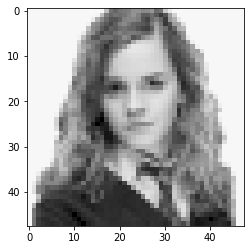

40.98995


-1

In [62]:
img = cv.imread('C:/Users/Advait C/Desktop/Coding/FaceDetector/Hermione_Granger.png', 0)
imgs = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(imgs)
plt.show()

img = cv.resize(img, (48, 48), interpolation=cv.INTER_AREA)
img = img.reshape(1, img.shape[0], img.shape[1], 1)

y_new = model.predict(img)
print(y_new[0][0])

cv.waitKey(10)

4  faces detected in the image
The predicted age of Person 1 is:  69.70075


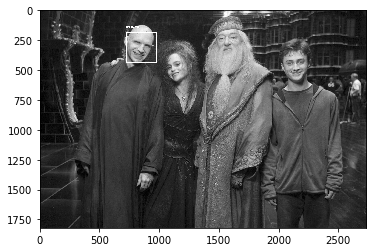

The predicted age of Person 2 is:  40.771534


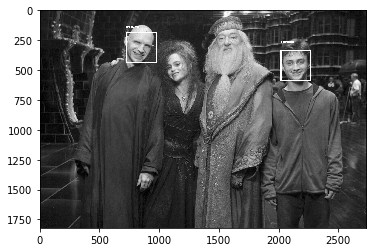

The predicted age of Person 3 is:  53.365227


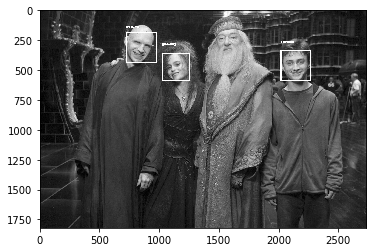

The predicted age of Person 4 is:  2.556094


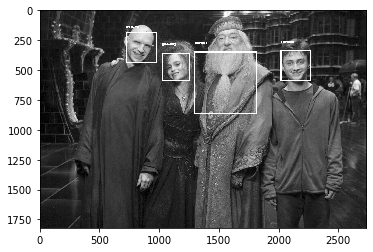

-1

In [69]:
import math

class Image():
    
    def Rectangles(self, name, faces_rect, img):
        print(len(faces_rect), " faces detected in the image")
        index = 0
        for (x, y, w, h) in faces_rect:
            thick = math.ceil(y/100)
            cv.rectangle(img, (x, y), (x+w, y+h), (255, 255, 255), thickness = 10)
            test_img = img[y:y+h, x:x+w]
            test_img = cv.resize(test_img, (48, 48), interpolation=cv.INTER_AREA)
            test_img = test_img.reshape(1, test_img.shape[0], test_img.shape[1], 1)
            index += 1
            y_new = model.predict(test_img)
            scale = 1
            a = x
            b = int(0.8 * y)
            number = name + str(index)
            cv.putText(img, str(y_new), (a, b), cv.FONT_HERSHEY_COMPLEX, 0.5, color = (255, 255, 0), thickness = thick)
            print("The predicted age of", number, "is: ", y_new[0][0])
            imgs = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            plt.imshow(imgs)
            plt.show()
        
    
    def ImageProcessing(self, name, img):
        haar_cascade = cv.CascadeClassifier('C:/Users/Advait C/Desktop/Coding/FaceDetector/haarcascade_frontalface_default.xml')
        a = math.ceil(img.shape[0]/15)
        b = math.ceil(img.shape[1]/15)
        faces_rect = haar_cascade.detectMultiScale(img, scaleFactor = 1.05, minNeighbors = 6, minSize =(a, b))
    
        if(len(faces_rect) == 0):
            cv.putText(img, "No face detected, please try a different image", (20, 20), cv.FONT_HERSHEY_COMPLEX, 1.0, (0, 255, 0), thickness = 1)
            imgs = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            plt.imshow(imgs)
            plt.show()
        
        elif(len(faces_rect) < 4):
             Images.Rectangles(name, faces_rect, img)
    
        else:
            faces_rect = haar_cascade.detectMultiScale(img, scaleFactor = 1.25, minNeighbors = 3, minSize = (a, b))
            Images.Rectangles(name, faces_rect, img)
    


img = cv.imread('C:/Users/Advait C/Desktop/Coding/FaceDetector/Group_Photo.jpg', 0)    
name = "Person "
Images = Image()
Images.ImageProcessing(name, img)
cv.waitKey(1000)